# New Versus Old Design 
A company has a website with a 5% conversion rate. They want to test a new design to see if it improves the conversion rate. They randomly show the new design to 100 users and the old design to another 100 users. The new design results in 10 conversions, while the old design results in 5 conversions. Is the new design statistically significant?

Source: Medium Microsoft Interview Question: https://platform.stratascratch.com/technical/2436-new-vs-old-design

# Explain
To answer this question, one must use a Two-proportion Z-test. This test is common when comparing proportions or percentages such as Treatment A vs Treatment B. 

# Two-proportion Z-test 
Correct Final Accepted Solution. 

In [1]:
import statsmodels.stats.proportion as sm_proportion
import numpy as np

# Conversion counts and sample sizes
old_conversions = 5
old_sample_size = 100
new_conversions = 10
new_sample_size = 100

# Perform two-proportion Z-test
z_statistic, p_value = sm_proportion.proportions_ztest([old_conversions, new_conversions], [old_sample_size, new_sample_size])
z_statistic, p_value = z_statistic.round(4), p_value.round(4)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

# Check statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is strong statistical significance.")
else:
    print("There is not enough statistical significance evidence.")

Z-statistic: -1.3423
P-value: 0.1795
There is not enough statistical significance evidence.


# T-test (Two-Sided)
My original solution was close to the correct solution, but I should not of used a two-sided T-test. 

In [2]:
import scipy.stats as stats
import numpy as np

# Data for two groups:
group1 = [1] * 5 + [0] * 95
group2 = [1] * 10 + [0] * 90

# Perform t-test:
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='two-sided')
t_statistic, p_value = t_statistic.round(4), p_value.round(4)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check statistical significance:
alpha = .05
if p_value < alpha:
    print("There is strong statistical significance.")
else:
    print("There is not enough statistical significance evidence.")
    
# Degree of Freedom:
degrees_of_freedom = len(group1)+len(group2)-2

# Calculate the z-score
z_score = stats.t.ppf(1 - (p_value / 2), df=degrees_of_freedom)
print("Z-score:", z_score.round(4))

T-statistic: -1.3416
P-value: 0.1812
There is not enough statistical significance evidence.
Z-score: 1.3418


# Confidence Intreval

In [3]:
confidence_level = 0.95

# Compute the standard error
standard_error = np.sqrt(np.var(group1) / len(group1) + np.var(group2) / len(group2))

# Calculate the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom) * standard_error

# Calculate the lower and upper bounds of the confidence interval
mean_difference = np.mean(group1) - np.mean(group2)
lower_bound = (mean_difference - margin_of_error).round(4)
upper_bound = (mean_difference + margin_of_error).round(4)

# Print the confidence interval
print("Confidence Interval:", (lower_bound, upper_bound))

Confidence Interval: (-0.1231, 0.0231)


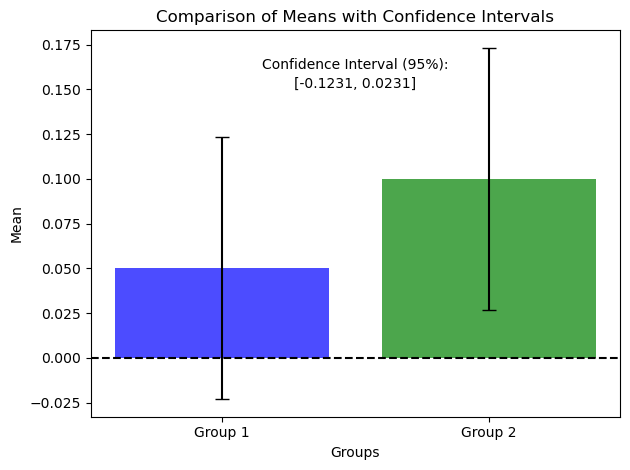

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart with error bars to plot the confidence interval
labels = ['Group 1', 'Group 2']
means = [np.mean(group1), np.mean(group2)]
errors = [margin_of_error, margin_of_error]

plt.bar(labels, means, yerr=errors, capsize=5, color=['blue', 'green'], alpha=0.7)
plt.axhline(0, color='black', linestyle='--')  # Reference line at zero

# Add annotations
plt.annotate(f'Confidence Interval ({int(confidence_level*100)}%):', xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
plt.annotate(f'[{lower_bound.round(4)}, {upper_bound.round(4)}]', xy=(0.5, 0.85), xycoords='axes fraction', ha='center')
plt.xlabel("Groups")
plt.ylabel("Mean")
plt.title("Comparison of Means with Confidence Intervals")
plt.tight_layout()
plt.show()

# Conclusion:
Since p-value is higher than .05, it means that the results are not statistically significant. 
The confidence intraval would also agree that the results are not significant as (-0.1231, 0.0231) is within the range very close to 0. 